In [2]:
list.of.packages <- c("tidyverse", "data.table", "dtplyr", "arrow", "dbplyr", "duckdb", "lme4", "dbscan", "pROC", "caTools")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(tidyverse)
library(data.table)
#library(dtplyr)
#library(dplyr, warn.conflicts = FALSE)
library(arrow)
library(duckdb)
library(lme4)
library(dbscan)
library(pROC)
library(caTools)

Warning message:
"package 'tidyverse' was built under R version 4.4.3"
Warning message:
"package 'tidyr' was built under R version 4.4.3"
Warning message:
"package 'readr' was built under R version 4.4.3"
Warning message:
"package 'purrr' was built under R version 4.4.3"
Warning message:
"package 'forcats' was built under R version 4.4.3"
Warning message:
"package 'lubridate' was built under R version 4.4.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'data.table' was built under R version

In [25]:
raw_shots <- read_csv("../Data/NBA_Shots_Raw.csv")
player_info <- read_csv("../Data/Player_Info.csv")
player_salary <- read_csv("../Data/Player_Salary.csv")
player_info <- player_info %>% mutate(PLAYER_NAME = paste(First_Name, Surname))
player_salary <- player_salary %>% rename(PLAYER_NAME = Name)
clean_shots <- read_csv("../Data/NBA_Shots_Clean_Example.csv")
common_player_info <- read_csv("../Data/wyatt_basketball/csv/common_player_info.csv")
common_player_info <- common_player_info %>% mutate(PLAYER_NAME = paste(first_name, last_name))


#clean_shots <- clean_shots %>% mutate(across(where(is.character), ~ str_replace_all(., "Kyle Oquinn", "Kyle O'Quinn")))
#clean_shots <- clean_shots %>% mutate(across(where(is.character), ~ str_replace_all(., "Al Farouq Aminu", "Al-Farouq Aminu")))
#clean_shots <- clean_shots %>% mutate(across(where(is.character), ~ str_replace_all(., "Lamarcus Aldridge", "LaMarcus Aldridge")))
#clean_shots <- clean_shots %>% mutate(across(where(is.character), ~ str_replace_all(., "Oj Mayo", "O.J. Mayo")))
#clean_shots <- clean_shots %>% mutate(across(where(is.character), ~ str_replace_all(., "Cj Miles", "C.J. Miles")))
player_info <- player_info %>% mutate(across(where(is.character), ~ str_replace_all(., "Luc Mbah", "Luc Mbah a Moute")))


player_info <- player_info %>% 
    mutate(PLAYER_NAME = str_to_title(PLAYER_NAME)) %>%
    mutate(PLAYER_NAME = str_remove_all(PLAYER_NAME, "\\.")) %>%
    mutate(PLAYER_NAME = str_replace_all(PLAYER_NAME, "-", " "))

# keep for now
player_info <- player_info %>% 
    mutate(Surname = str_to_title(Surname)) %>%
    mutate(Surname = str_remove_all(Surname, "\\.")) %>%
    mutate(Surname = str_replace_all(Surname, "-", " "))

clean_shots <- clean_shots %>%
    mutate(PLAYER_NAME = str_replace_all(PLAYER_NAME, "-", " "))


Rows: 128069 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (8): DATE, HOME_TEAM, AWAY_TEAM, PLAYER_NAME, LOCATION, W, SHOT_RESULT...
dbl  (14): GAME_ID, PLAYER_ID, FINAL_MARGIN, SHOT_NUMBER, PERIOD, SHOT_CLOCK...
time  (1): GAME_CLOCK

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 475 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Birth_Place, Birthdate, College, Experience, First_Name, Pos, Surna...
dbl (5): ...1, Age, Height, Weight, BMI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 513 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1

In [26]:
colnames(raw_shots)
colnames(clean_shots)
colnames(player_info)
colnames(player_salary)
colnames(common_player_info)
#player_statistics %>% count() %>% collect()
#head(raw_shots)
#head(player_info)
#head(player_salary)

[1] "GAME_ID"             "DATE"                "HOME_TEAM"          
 [4] "AWAY_TEAM"           "PLAYER_NAME"         "PLAYER_ID"          
 [7] "LOCATION"            "W"                   "FINAL_MARGIN"       
[10] "SHOT_NUMBER"         "PERIOD"              "GAME_CLOCK"         
[13] "SHOT_CLOCK"          "DRIBBLES"            "TOUCH_TIME"         
[16] "SHOT_DIST"           "PTS_TYPE"            "SHOT_RESULT"        
[19] "CLOSEST_DEFENDER"    "CLOSEST_DEFENDER_ID" "CLOSE_DEF_DIST"     
[22] "FGM"                 "PTS"

[1] "GAME_ID"             "DATE"                "HOME_TEAM"          
 [4] "AWAY_TEAM"           "PLAYER_NAME"         "PLAYER_ID"          
 [7] "LOCATION"            "WIN_LOSE"            "FINAL_MARGIN"       
[10] "SHOT_NUMBER"         "PERIOD"              "SEC_REMAIN"         
[13] "SHOT_CLOCK"          "DRIBBLES"            "TOUCH_TIME"         
[16] "SHOT_DIST"           "PTS_TYPE"            "CLOSEST_DEFENDER"   
[19] "CLOSEST_DEFENDER_ID" "CLOSE_DEF_DIST"      "SUCCESS"

[1] "...1"        "Age"         "Birth_Place" "Birthdate"   "College"    
 [6] "Experience"  "First_Name"  "Height"      "Pos"         "Surname"    
[11] "Team"        "Weight"      "BMI"         "PLAYER_NAME"

[1] "PLAYER_NAME" "Salary"

[1] "person_id"                        "first_name"                      
 [3] "last_name"                        "display_first_last"              
 [5] "display_last_comma_first"         "display_fi_last"                 
 [7] "player_slug"                      "birthdate"                       
 [9] "school"                           "country"                         
[11] "last_affiliation"                 "height"                          
[13] "weight"                           "season_exp"                      
[15] "jersey"                           "position"                        
[17] "rosterstatus"                     "games_played_current_season_flag"
[19] "team_id"                          "team_name"                       
[21] "team_abbreviation"                "team_code"                       
[23] "team_city"                        "playercode"                      
[25] "from_year"                        "to_year"                         
[27] "dleague_flag"                     "nba_flag"                        
[29] "games_played_flag"                "draft_year"                      
[31] "draft_round"                      "draft_number"                    
[33] "greatest_75_flag"                 "PLAYER_NAME"

Warning message in left_join(., player_info %>% select(Pos, PLAYER_NAME), by = "PLAYER_NAME"):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 442 of `x` matches multiple rows in `y`.
ℹ Row 288 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


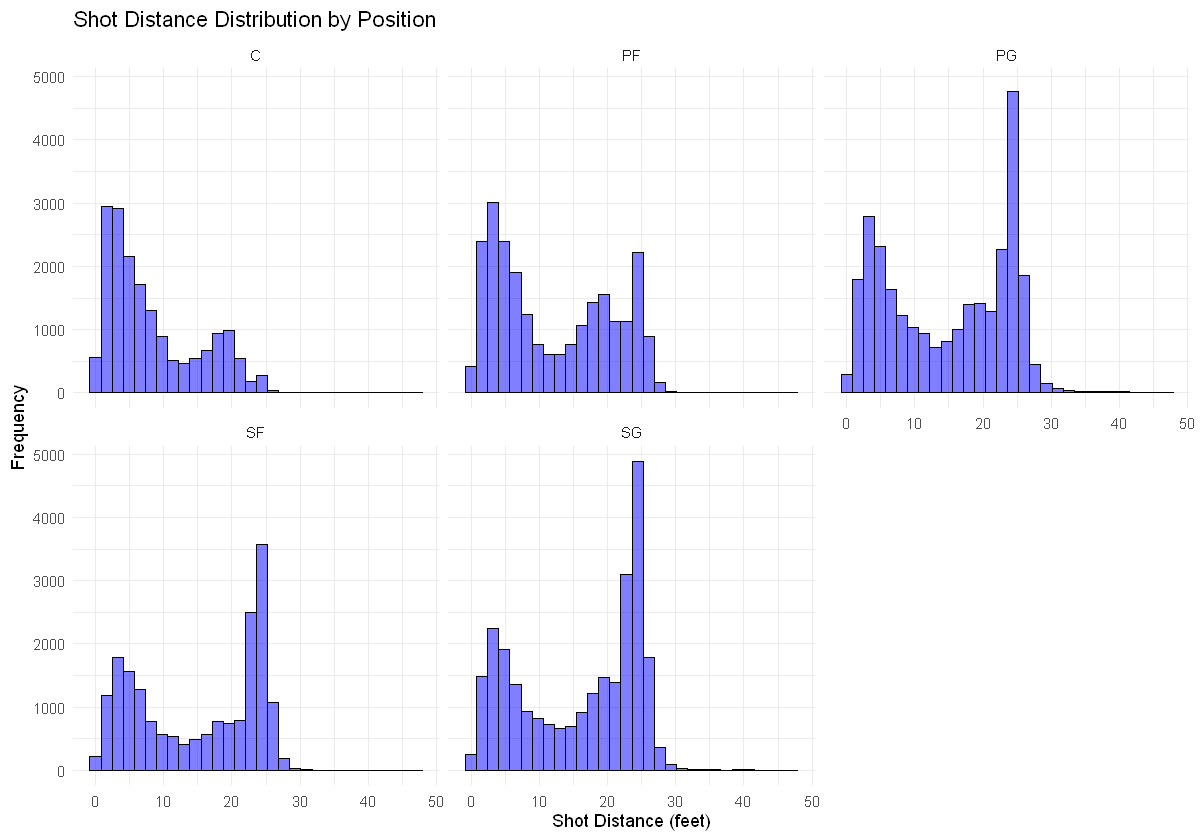

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7)

s <- raw_shots %>% 
    left_join(player_info %>% select(Pos, PLAYER_NAME), by = "PLAYER_NAME") %>%
    filter(!is.na(Pos)) %>%
    select(SHOT_DIST, Pos)

ggplot(s, aes(x = SHOT_DIST)) +
    geom_histogram(bins = 30, fill = "blue", color = "black", alpha = 0.5) +
    facet_wrap(~ Pos) +
    labs(title = "Shot Distance Distribution by Position",
       x = "Shot Distance (feet)",
       y = "Frequency") +
    theme_minimal()

In [6]:
l1 <- raw_shots %>%
    left_join(player_info %>% select(Pos, PLAYER_NAME), by = "PLAYER_NAME", relationship="many-to-many") %>%
    filter(!is.na(Pos)) %>%
    group_by(PLAYER_NAME, Pos) %>% 
    summarize(tot_FGM = sum(FGM), .groups="drop") %>% 
    arrange(desc(tot_FGM))
l2 <- raw_shots %>% 
    filter(FGM == 1) %>% 
    group_by(PLAYER_NAME) %>%
    summarise(
        total_FGM = n(),
        pct_3pt = sum(PTS_TYPE == 3),
        pct_2pt = sum(PTS_TYPE == 2)
    ) %>%
    left_join(player_info %>% select(Pos, PLAYER_NAME, Team, Age), by = "PLAYER_NAME", relationship="many-to-many")

In [7]:
raw_shots %>% summarise(unique_players = n_distinct(PLAYER_NAME))
player_info %>% summarise(unique_players = n_distinct(PLAYER_NAME))
player_salary %>% summarise(unique_players = n_distinct(PLAYER_NAME))

unique_players
<int>
281


unique_players
<int>
425


unique_players
<int>
513


In [8]:
#clean_shots %>% 
#    filter(PERIOD <= 3) %>%
#    select(HOME_TEAM, AWAY_TEAM, WIN_LOSE)
#    group_by(

#clean_shots %>% 
#    select(GAME_ID, FINAL_MARGIN, WIN_LOSE, HOME_TEAM, AWAY_TEAM, LOCATION) %>%
#    filter(abs(FINAL_MARGIN) <= 3) %>% #no need to filter for w/l
 #   distinct(GAME_ID, .keep_all=TRUE) %>%
#    summarise(home_win_pct = 100*sum(FINAL_MARGIN > 0 & LOCATION == "H")/sum(LOCATION == "H"))


#clean_shots %>%
#    select(GAME_ID, WIN_LOSE, HOME_TEAM, AWAY_TEAM, LOCATION, PERIOD, PTS_TYPE, SUCCESS) %>%
#    mutate(pts = PTS_TYPE * SUCCESS) %>%
#    filter(PERIOD <= 3) %>%
#    group_by(GAME_ID, LOCATION) %>%
#    summarise(total_pts = sum(pts), .groups = "drop") %>%
#    pivot_wider(names_from = LOCATION, values_from = total_pts, names_prefix = "pts_") %>%
#    summarise(pts_diff_H = pts_H-pts_A)

home_win <- clean_shots %>%
    filter(LOCATION == "H") %>%
    select(GAME_ID, HOME_TEAM, AWAY_TEAM, WIN_LOSE) %>%
    distinct(GAME_ID, .keep_all=TRUE)

clean_shots %>%
    filter(PERIOD <= 3) %>%
    mutate(pts = PTS_TYPE * SUCCESS) %>%
    group_by(GAME_ID, LOCATION) %>%
    summarise(total_pts = sum(pts), .groups = "drop") %>%
    pivot_wider(names_from = LOCATION, values_from = total_pts, names_prefix = "pts_") %>%
    left_join(home_win, by="GAME_ID") %>%
    rename(HOME_RESULT = WIN_LOSE) %>%
    mutate(pts_diff = abs(pts_H - pts_A)) %>%
    filter(pts_diff <= 3) %>%
    summarise(
        home_pct_win = sum(HOME_RESULT == "W")/n(),
        home_wins = sum(HOME_RESULT == "W"),
        total_games = n()
    )

binom.test(x=86, n=161, p=0.5, alternative="greater")

home_pct_win,home_wins,total_games
<dbl>,<int>,<int>
0.5341615,86,161



	Exact binomial test

data:  86 and 161
number of successes = 86, number of trials = 161, p-value = 0.2154
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.466325 1.000000
sample estimates:
probability of success 
             0.5341615 


In [9]:
play_by_play <- open_dataset("../Data/wyatt_basketball/csv/play_by_play.csv", format="csv")

In [10]:
con <- DBI::dbConnect(
  duckdb::duckdb(), dbdir = ".tmp.duckdb"
)

In [11]:
duckdb_read_csv(con, name="play_by_play", files="../Data/wyatt_basketball/csv/play_by_play.csv")

In [12]:
colnames(tbl(con, "play_by_play") %>% head(1))

[1] "game_id"                   "eventnum"                 
 [3] "eventmsgtype"              "eventmsgactiontype"       
 [5] "period"                    "wctimestring"             
 [7] "pctimestring"              "homedescription"          
 [9] "neutraldescription"        "visitordescription"       
[11] "score"                     "scoremargin"              
[13] "person1type"               "player1_id"               
[15] "player1_name"              "player1_team_id"          
[17] "player1_team_city"         "player1_team_nickname"    
[19] "player1_team_abbreviation" "person2type"              
[21] "player2_id"                "player2_name"             
[23] "player2_team_id"           "player2_team_city"        
[25] "player2_team_nickname"     "player2_team_abbreviation"
[27] "person3type"               "player3_id"               
[29] "player3_name"              "player3_team_id"          
[31] "player3_team_city"         "player3_team_nickname"    
[33] "player3_team_abbreviation" "video_available_flag"

In [13]:
tbl(con, "play_by_play") %>% count(eventmsgtype) %>% collect()
tbl(con, "play_by_play") %>% filter(eventmsgtype == 1) %>% head(10) %>% collect()

eventmsgtype,n
<int>,<dbl>
1,2242357
2,2699376
3,1442567
4,3049623
5,868202
6,1305746
7,53184
8,1226332
9,380586


game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,⋯,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
29600012,13,1,8,1,14:53 PM,10:40,O'Neal Slam Dunk (2 PTS) (Van Exel 1 AST),NA,NA,⋯,Lakers,LAL,0,0,NA,NA,NA,NA,NA,0
29600012,16,1,5,1,14:53 PM,10:05,Ceballos Layup (2 PTS) (Jones 1 AST),NA,NA,⋯,Lakers,LAL,0,0,NA,NA,NA,NA,NA,0
29600012,29,1,5,1,14:55 PM,8:53,NA,NA,Person Layup (2 PTS) (Kleine 1 AST),⋯,Suns,PHX,4,0,NA,1610612747,Los Angeles,Lakers,LAL,0
29600012,39,1,3,1,14:57 PM,8:03,O'Neal 7' Hook Shot (4 PTS) (Jones 2 AST),NA,NA,⋯,Lakers,LAL,0,0,NA,NA,NA,NA,NA,0
29600012,42,1,5,1,14:58 PM,7:39,Ceballos Layup (4 PTS) (Fisher 1 AST),NA,NA,⋯,Lakers,LAL,0,0,NA,NA,NA,NA,NA,0
29600012,48,1,1,1,14:59 PM,7:05,Fisher 25' 3PT Jump Shot (3 PTS) (Campbell 1 AST),NA,NA,⋯,Lakers,LAL,0,0,NA,NA,NA,NA,NA,0
29600012,49,1,1,1,14:59 PM,6:46,NA,NA,Cassell 15' Jump Shot (4 PTS) (Green 1 AST),⋯,Suns,PHX,0,0,NA,NA,NA,NA,NA,0
29600012,50,1,1,1,15:00 PM,6:30,Jones 24' 3PT Jump Shot (3 PTS) (O'Neal 1 AST),NA,NA,⋯,Lakers,LAL,0,0,NA,NA,NA,NA,NA,0
29600012,56,1,1,1,15:03 PM,5:44,Campbell 14' Jump Shot (3 PTS) (Fisher 2 AST),NA,NA,⋯,Lakers,LAL,0,0,NA,NA,NA,NA,NA,0


In [14]:
dbDisconnect(con, shutdown=TRUE)

In [32]:
predictors <- c("PLAYER_NAME", "CLOSEST_DEFENDER" ,"SHOT_DIST", "PTS_TYPE", "CLOSE_DEF_DIST", "SHOT_CLOCK", "TOUCH_TIME", "PERIOD", "SUCCESS")
colnames(player_info)
colnames(clean_shots)
head(common_player_info %>% filter(first_name == "Tim"))

lookup_height_pos <- player_info %>%
    select(PLAYER_NAME, Height, Pos)

model_data <- clean_shots %>% 
    select(all_of(predictors)) %>%
    left_join(lookup_height_pos, by="PLAYER_NAME", relationship = "many-to-many") %>%
    rename(SHOOTER_POS = Pos, SHOOTER_HEIGHT = Height) %>%
    left_join(lookup_height_pos %>% rename(CLOSEST_DEFENDER = PLAYER_NAME), by="CLOSEST_DEFENDER") %>%
    rename(DEFENDER_POS = Pos, DEFENDER_HEIGHT = Height)



set.seed(0)
train_indices <- sample(1:nrow(model_data), size = 0.70 * nrow(model_data))
train <- model_data[train_indices, ]
test <- model_data[-train_indices, ]

#lookup_height_pos %>% head(10)


#dplyr::filter(clean_shots, grepl("Kyle",PLAYER_NAME)) ## found issues with apostrophe in name of Kyle O'Quinn (was Oquinn)

bad_names <- model_data %>% filter(is.na(SHOOTER_HEIGHT) | is.na(SHOOTER_POS)) %>% distinct(PLAYER_NAME, .keep_all=FALSE)

dplyr::filter(player_info, grepl("Hardaway",PLAYER_NAME))

#player_info %>% filter(Team == "LAL") %>% distinct(PLAYER_NAME)

#Robert Sacre not in player_info. Plays for LAL
#Jason Terry not in either. Plays for HOU
#John Salmons not in player_info. Played for NOP and got traded to PHX midseason
#Brandan Wright not in player_info. Played for BOS and got traded to PHX at some point
#Cody Zeller ... Played for Charlotte Bobcats

model_data %>% filter(is.na(SHOOTER_HEIGHT)) %>% count()
bad_names


[1] "...1"        "Age"         "Birth_Place" "Birthdate"   "College"    
 [6] "Experience"  "First_Name"  "Height"      "Pos"         "Surname"    
[11] "Team"        "Weight"      "BMI"         "PLAYER_NAME"

[1] "GAME_ID"             "DATE"                "HOME_TEAM"          
 [4] "AWAY_TEAM"           "PLAYER_NAME"         "PLAYER_ID"          
 [7] "LOCATION"            "WIN_LOSE"            "FINAL_MARGIN"       
[10] "SHOT_NUMBER"         "PERIOD"              "SEC_REMAIN"         
[13] "SHOT_CLOCK"          "DRIBBLES"            "TOUCH_TIME"         
[16] "SHOT_DIST"           "PTS_TYPE"            "CLOSEST_DEFENDER"   
[19] "CLOSEST_DEFENDER_ID" "CLOSE_DEF_DIST"      "SUCCESS"

person_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,⋯,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag,PLAYER_NAME
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
76120,Tim,Bassett,Tim Bassett,"Bassett, Tim",T. Bassett,tim-bassett,1951-04-01,Georgia,USA,⋯,1976,1979,N,Y,Y,1973,7,106,N,Tim Bassett
160,Tim,Breaux,Tim Breaux,"Breaux, Tim",T. Breaux,tim-breaux,1970-09-19,Wyoming,USA,⋯,1994,1997,N,Y,Y,Undrafted,Undrafted,Undrafted,N,Tim Breaux
1495,Tim,Duncan,Tim Duncan,"Duncan, Tim",T. Duncan,tim-duncan,1976-04-25,Wake Forest,US Virgin Islands,⋯,1997,2015,N,Y,Y,1997,1,1,Y,Tim Duncan
204025,Tim,Frazier,Tim Frazier,"Frazier, Tim",T. Frazier,tim-frazier,1990-11-01,Penn State,USA,⋯,2014,2021,Y,Y,Y,Undrafted,Undrafted,Undrafted,N,Tim Frazier
896,Tim,Hardaway,Tim Hardaway,"Hardaway, Tim",T. Hardaway,tim-hardaway,1966-09-01,Texas-El Paso,USA,⋯,1989,2002,N,Y,Y,1989,1,14,N,Tim Hardaway
203501,Tim,Hardaway Jr.,Tim Hardaway Jr.,"Hardaway Jr., Tim",T. Hardaway Jr.,tim-hardaway-jr,1992-03-16,Michigan,USA,⋯,2013,2023,Y,Y,Y,2013,1,24,N,Tim Hardaway Jr.


Warning message in left_join(., lookup_height_pos %>% rename(CLOSEST_DEFENDER = PLAYER_NAME), :
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 97 of `x` matches multiple rows in `y`.
ℹ Row 334 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


...1,Age,Birth_Place,Birthdate,College,Experience,First_Name,Height,Pos,Surname,Team,Weight,BMI,PLAYER_NAME
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
310,23,us,"March 16, 1992",University of Michigan,1,Tim,195,SG,Hardaway,NYK,92.25,24.26036,Tim Hardaway


n
<int>
15121


PLAYER_NAME
<chr>
Kyle Oquinn
Robert Sacre
Jason Terry
Cody Zeller
Hollis Thompson
Jakarr Sampson
Henry Sims
Marcus Thornton
Tyler Zeller


In [16]:
bad_names %>% mutate(Surname = str_extract(PLAYER_NAME, "\\S+$")) %>% left_join(player_info %>% select(Surname, Age))
player_info %>% head(10)
dplyr::filter(player_info, grepl("Williams",PLAYER_NAME))

Joining with `by = join_by(Surname)`
Warning message in left_join(., player_info %>% select(Surname, Age)):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 12 of `x` matches multiple rows in `y`.
ℹ Row 63 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


PLAYER_NAME,Surname,Age
<chr>,<chr>,<dbl>
Kyle Oquinn,Oquinn,NA
Robert Sacre,Sacre,NA
Jason Terry,Terry,NA
Cody Zeller,Zeller,NA
Hollis Thompson,Thompson,25
Jakarr Sampson,Sampson,NA
Henry Sims,Sims,NA
Marcus Thornton,Thornton,NA
Tyler Zeller,Zeller,NA


...1,Age,Birth_Place,Birthdate,College,Experience,First_Name,Height,Pos,Surname,Team,Weight,BMI,PLAYER_NAME
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,33,mk,"July 29, 1982",NA,1,Pero,207.5,PF,Antic,ATL,117.00,27.17376,Pero Antic
1,26,us,"July 1, 1989",Old Dominion University,2,Kent,192.5,SG,Bazemore,ATL,90.45,24.40884,Kent Bazemore
2,36,us,"March 11, 1979",Duke University,15,Elton,200.0,C,Brand,ATL,123.75,30.93750,Elton Brand
3,29,us,"July 27, 1986",University of Missouri,5,DeMarre,200.0,SF,Carroll,ATL,96.75,24.18750,Demarre Carroll
4,27,us,"June 5, 1988",Gonzaga University,5,Austin,207.5,SF,Daye,ATL,99.00,22.99318,Austin Daye
5,29,do,"June 3, 1986",University of Florida,7,Al,205.0,C,Horford,ATL,110.25,26.23438,Al Horford
6,24,us,"March 6, 1991",Vanderbilt University,2,John,190.0,SG,Jenkins,ATL,96.75,26.80055,John Jenkins
7,34,us,"March 17, 1981",Creighton University,11,Kyle,197.5,SG,Korver,ATL,95.40,24.45762,Kyle Korver
8,25,us,"April 22, 1990",Butler University,3,Shelvin,187.5,PG,Mack,ATL,91.35,25.98400,Shelvin Mack


...1,Age,Birth_Place,Birthdate,College,Experience,First_Name,Height,Pos,Surname,Team,Weight,BMI,PLAYER_NAME
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
62,29,us,"June 19, 1986",University of North Carolina,9,Marvin,202.5,PF,Williams,CHA,106.65,26.00823,Marvin Williams
63,33,us,"December 19, 1982",University of Alabama,11,Mo,182.5,PG,Williams,CHA,89.10,26.75174,Mo Williams
255,24,us,"October 10, 1991",Syracuse University,1,Michael,195.0,PG,Carter Williams,MIL,85.50,22.48521,Michael Carter Williams
350,24,us,"October 10, 1991",Syracuse University,1,Michael,195.0,PG,Carter Williams,PHI,85.50,22.48521,Michael Carter Williams
442,29,us,"October 27, 1986",NA,9,Lou,182.5,SG,Williams,TOR,78.75,23.64421,Lou Williams


In [17]:
log_model <- glm(SUCCESS ~ SHOT_DIST + CLOSE_DEF_DIST + SHOT_CLOCK + TOUCH_TIME, data=clean_shots, family="binomial")
log_mm_model <- glmer(SUCCESS ~ SHOT_DIST + CLOSE_DEF_DIST + SHOT_CLOCK + TOUCH_TIME + PERIOD +
                      (SHOT_DIST | PLAYER_ID),
                    data = train_data,
                    family=binomial(link = "logit"))

summary(log_mm_model)
test_data$pred_prob <- predict(log_mm_model, type = "response", newdata=test_data)
roc(SUCCESS ~ pred_prob, data = test_data)

ERROR: Error: bad 'data': object 'train_data' not found


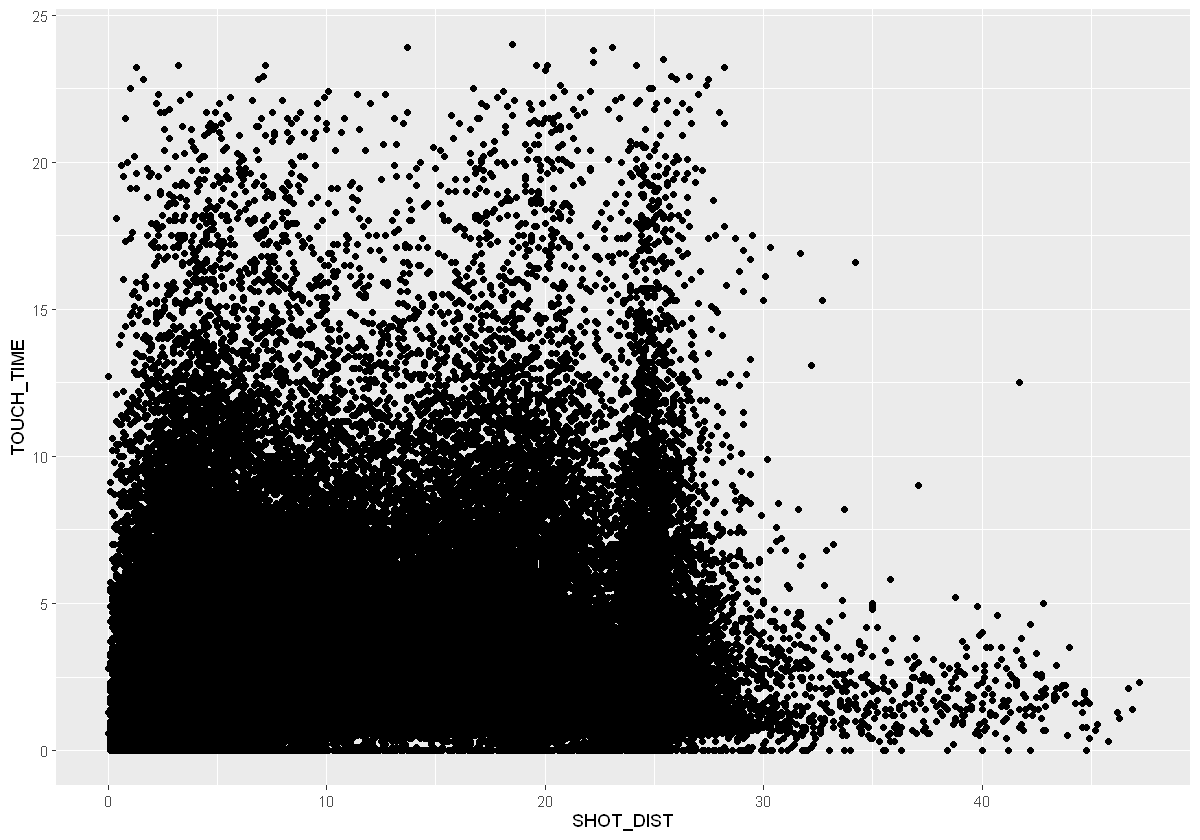

In [ ]:
ggplot(clean_shots, aes(x=SHOT_DIST, y=TOUCH_TIME)) + 
    geom_point()